In [41]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [42]:
# Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

len(X), len(y)

(100, 100)

In [43]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [44]:
#Split the data into 80% training, 20% testing.
split = int(0.8 * len(X))
X_train , y_train  = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [45]:
#Plot the training and testing data so it becomes visual.
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = None):


  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c="r", s=4, label="Prediction")

  plt.legend(prop={"size": 14})

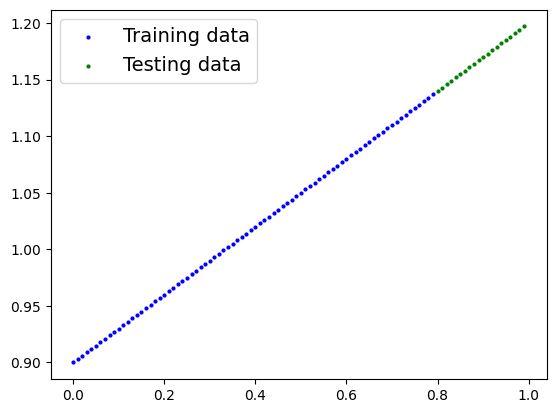

In [46]:
plot_prediction()

In [55]:
#Build a PyTorch model by subclassing nn.Module.

class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear(x)

model_0 = LinearRegressionModelV1()
model_0, model_0.state_dict()

(LinearRegressionModelV1(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

In [57]:
# Turn model into evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[1.4416],
        [1.4493],
        [1.4569],
        [1.4646],
        [1.4722],
        [1.4799],
        [1.4875],
        [1.4952],
        [1.5028],
        [1.5104],
        [1.5181],
        [1.5257],
        [1.5334],
        [1.5410],
        [1.5487],
        [1.5563],
        [1.5640],
        [1.5716],
        [1.5793],
        [1.5869]])

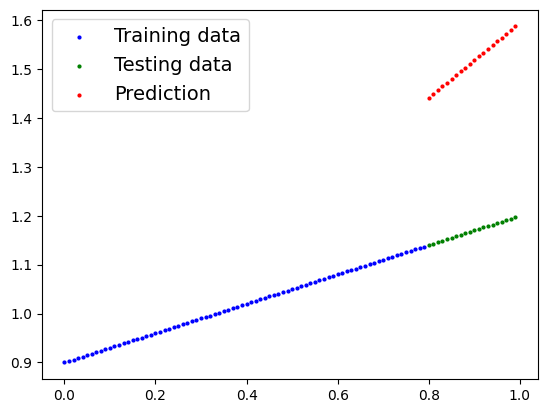

In [59]:
# Put data on the CPU and plot it
plot_prediction(prediction=y_preds)

In [60]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [61]:
#Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [62]:
#Write a training loop to perform the appropriate training steps for 300 epochs.
#The training loop should test the model on the test dataset every 20 epochs.

torch.manual_seed(42)

# Set the number of epochs
epochs = 300


for epoch in range(epochs):
    ### Training
    model_0.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    if epoch % 20 == 0:
      ### Testing
      model_0.eval() # put the model in evaluation mode for testing (inference)
      # 1. Forward pass
      with torch.inference_mode():

        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)


        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.12756133079528809 | Test loss: 0.33650320768356323
Epoch: 20 | Train loss: 0.08187223970890045 | Test loss: 0.2184026539325714
Epoch: 40 | Train loss: 0.07207288593053818 | Test loss: 0.17458662390708923
Epoch: 60 | Train loss: 0.06507987529039383 | Test loss: 0.15310418605804443
Epoch: 80 | Train loss: 0.05822876840829849 | Test loss: 0.1367770880460739
Epoch: 100 | Train loss: 0.05137667804956436 | Test loss: 0.12079393863677979
Epoch: 120 | Train loss: 0.044525571167469025 | Test loss: 0.10446684062480927
Epoch: 140 | Train loss: 0.037674423307180405 | Test loss: 0.08813951164484024
Epoch: 160 | Train loss: 0.03082224354147911 | Test loss: 0.0721558928489685
Epoch: 180 | Train loss: 0.02397105097770691 | Test loss: 0.055828340351581573
Epoch: 200 | Train loss: 0.01711984910070896 | Test loss: 0.03950077295303345
Epoch: 220 | Train loss: 0.010267667472362518 | Test loss: 0.02351721003651619
Epoch: 240 | Train loss: 0.0034169009886682034 | Test loss: 0.0071918

In [63]:
# Turn model into evaluation mode
model_0.eval()

#Make predictions with the trained model on the test data.
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]])

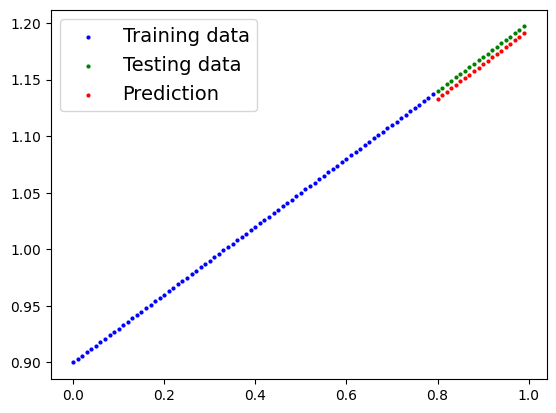

In [64]:
#Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
plot_prediction(prediction=y_preds)

In [65]:
#Save your trained model's state_dict() to file.
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [68]:
#Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV1()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
# loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
#print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV1(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [69]:
#Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])